## Import

In [2]:
import pandas as pd
import random
import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import pandas_profiling

In [3]:
class CFG:
    SEED = 42

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

## Data Load

In [5]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [6]:
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [7]:
test

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


In [8]:
# pr_train = train.profile_report()
# pr_test = test.profile_report()

In [9]:
# pr_train.to_file('./pr_train_report.html')

# pr_test.to_file('./pr_test_report.html')



In [10]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [11]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [12]:
train_x


,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,0,0,0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A
1,0,0,0,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A
2,0,0,0,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A
3,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G
4,0,0,0,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,0,0,2,A G,A G,A A,G A,C C,A G,A A,G A,A A,G G,A G,G A,A A,A A,A A
258,0,0,0,2,G G,A A,C A,A A,A A,A G,G A,G A,A A,A G,A G,A A,A G,A A,G A
259,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A A,G G,G G,G G,C A,G G
260,0,0,0,1,A A,G G,A A,G A,A A,G G,G G,A A,G A,A G,A G,G A,G G,C A,G G


## Data Pre-processing
### Label-Encoding

In [13]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [14]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [15]:
snp_data

['G G',
 'A G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A G',
 'G G',
 'A A',
 'A A',
 'A G',
 'A A',
 'G G',
 'G G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A G',
 'G G',
 'A A',
 'G G',
 'A G',
 'A A',
 'A A',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'A A',
 'G G',
 'A A',
 'A A',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'A A',
 'A A',
 'G G',
 'A A',
 'G G',
 'A A',
 'A A',
 'A G',
 'A G',
 'A A',
 'G G',
 'A A',
 'G G',
 'G G',
 'A G',
 'A G',
 'A A',
 'A G',
 'G G',
 'A G',
 'G G',
 'G G',
 'G G',
 'A A',
 'A G',
 'G G',
 'A G',
 'A G',
 'G G',
 'A A',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'G G',
 'A G',
 'A A',
 'A G',
 'A G',
 'A G',
 'G G',
 'A G',
 'G G',
 'A A',
 'A G',
 'G G',
 'G G',
 'G G',
 'A G',
 'G G',
 'G G',
 'A G',
 'A G',
 'G G',
 'G G',
 'G G',
 'A A',
 'A G',
 'A G',
 'G G',
 'G G',
 'G G',
 'A G',
 'A A',


In [16]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [17]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

## Model Fit

In [27]:
clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)

DecisionTreeClassifier()

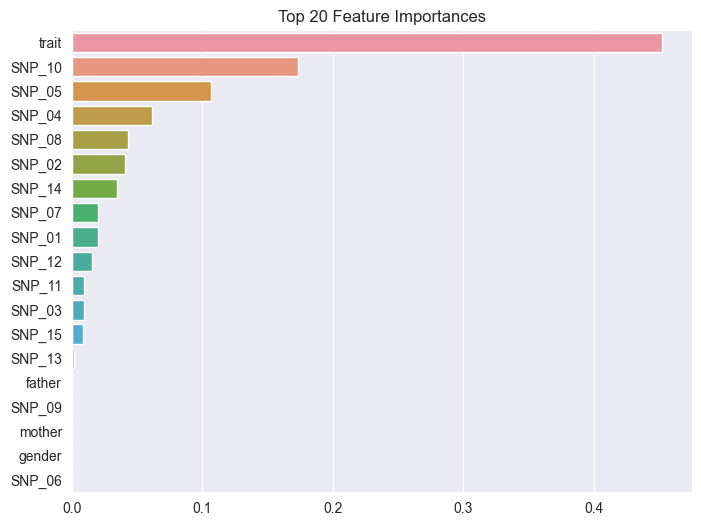

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## Inference

In [29]:
preds = clf.predict(test_x)
print('Done.')

Done.


## Submission

In [30]:
submit = pd.read_csv('./sample_submission.csv')

In [31]:
submit['class'] = class_le.inverse_transform(preds)

In [36]:
# submit.to_csv('./answer/decision_submit.csv', index=False)

In [33]:
compare = pd.read_csv('./answer/submit.csv')

In [34]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns

cm2 = confusion_matrix(submit['class'],compare['class'])
cmdf2 = pd.DataFrame(cm2
                     # , index=['실제값(N)', '실제값(P)']
                     # , columns=['예측값(N)', '예측값(P)']
                     )
cmdf2

,0,1,2
0,51,0,0
1,0,80,1
2,0,6,37


In [35]:
cm2

array([[51,  0,  0],
       [ 0, 80,  1],
       [ 0,  6, 37]], dtype=int64)